In [6]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

In [7]:
saves_dir = os.path.join("../saves", "negation_dep_parsing")
Path(saves_dir).mkdir(parents=True, exist_ok=True) 
datasets = json.loads(open("../input.json").read())
preload_flag = True
plot_save_prefix = "pos_neg_negation_depparsing"
analysis_types = [
    "word_level", 
    "sent_level", 
    "review_level"
]

'sent_level'
Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_sent_level_non_amz


/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


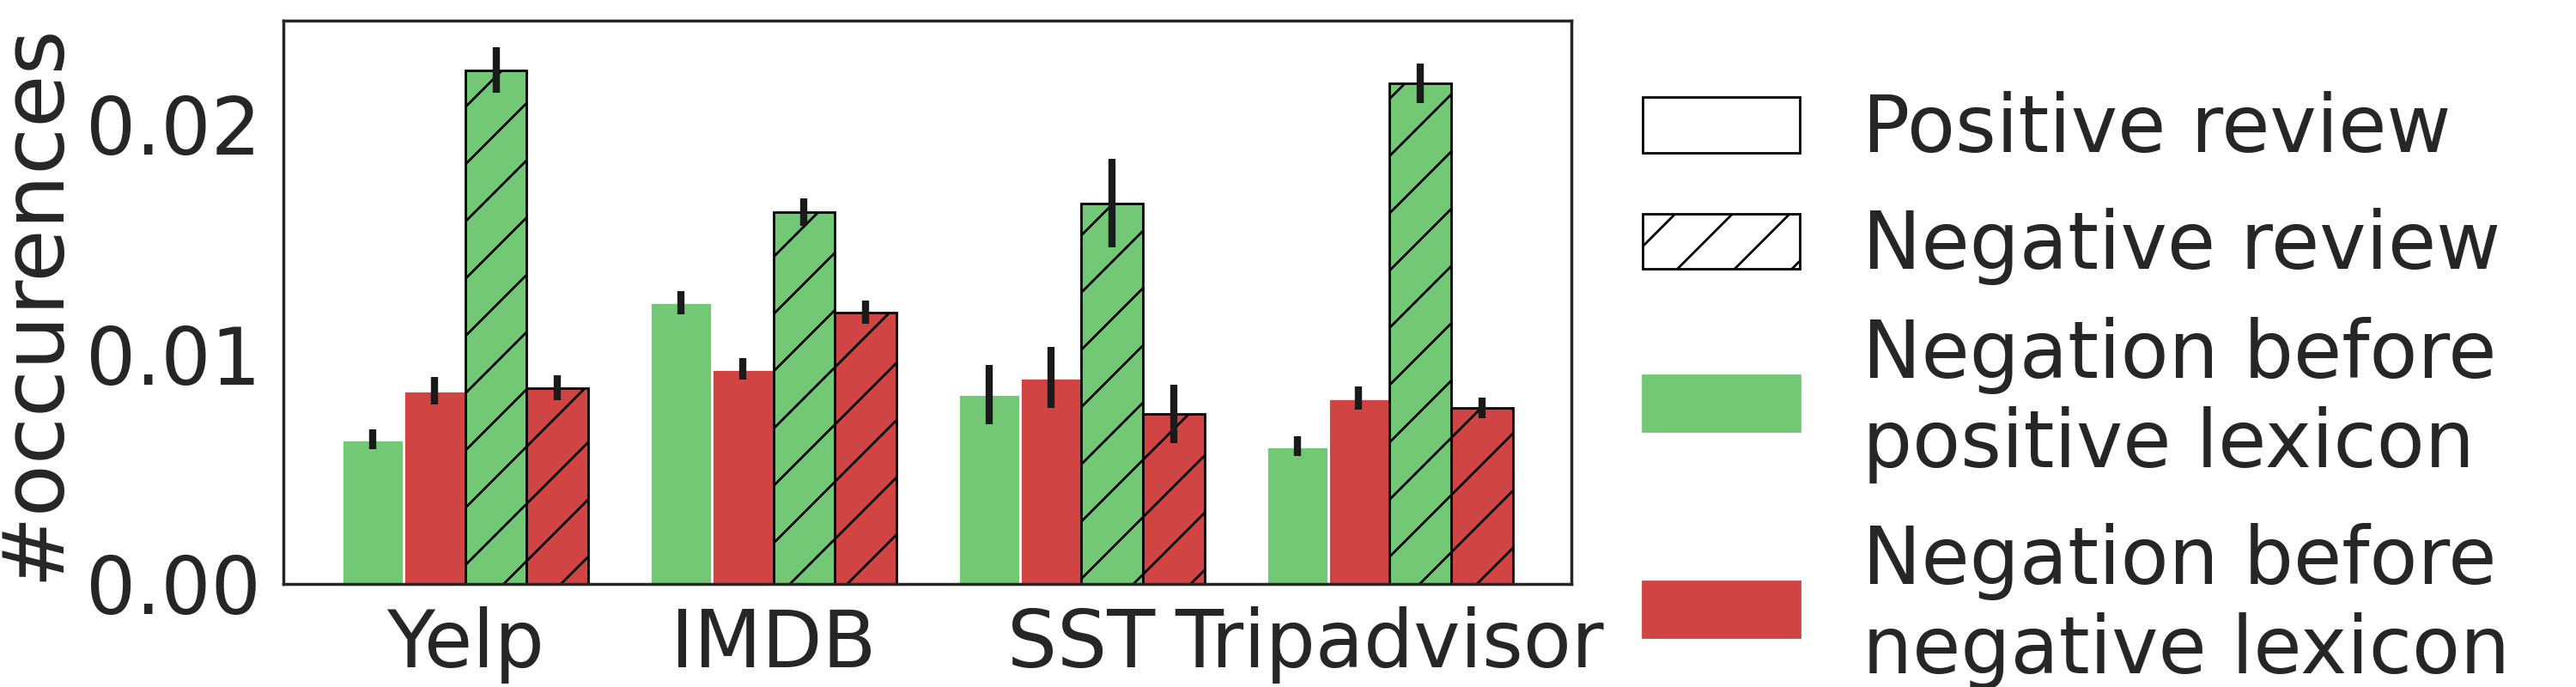

Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_sent_level_amz


<IPython.core.display.Javascript object>


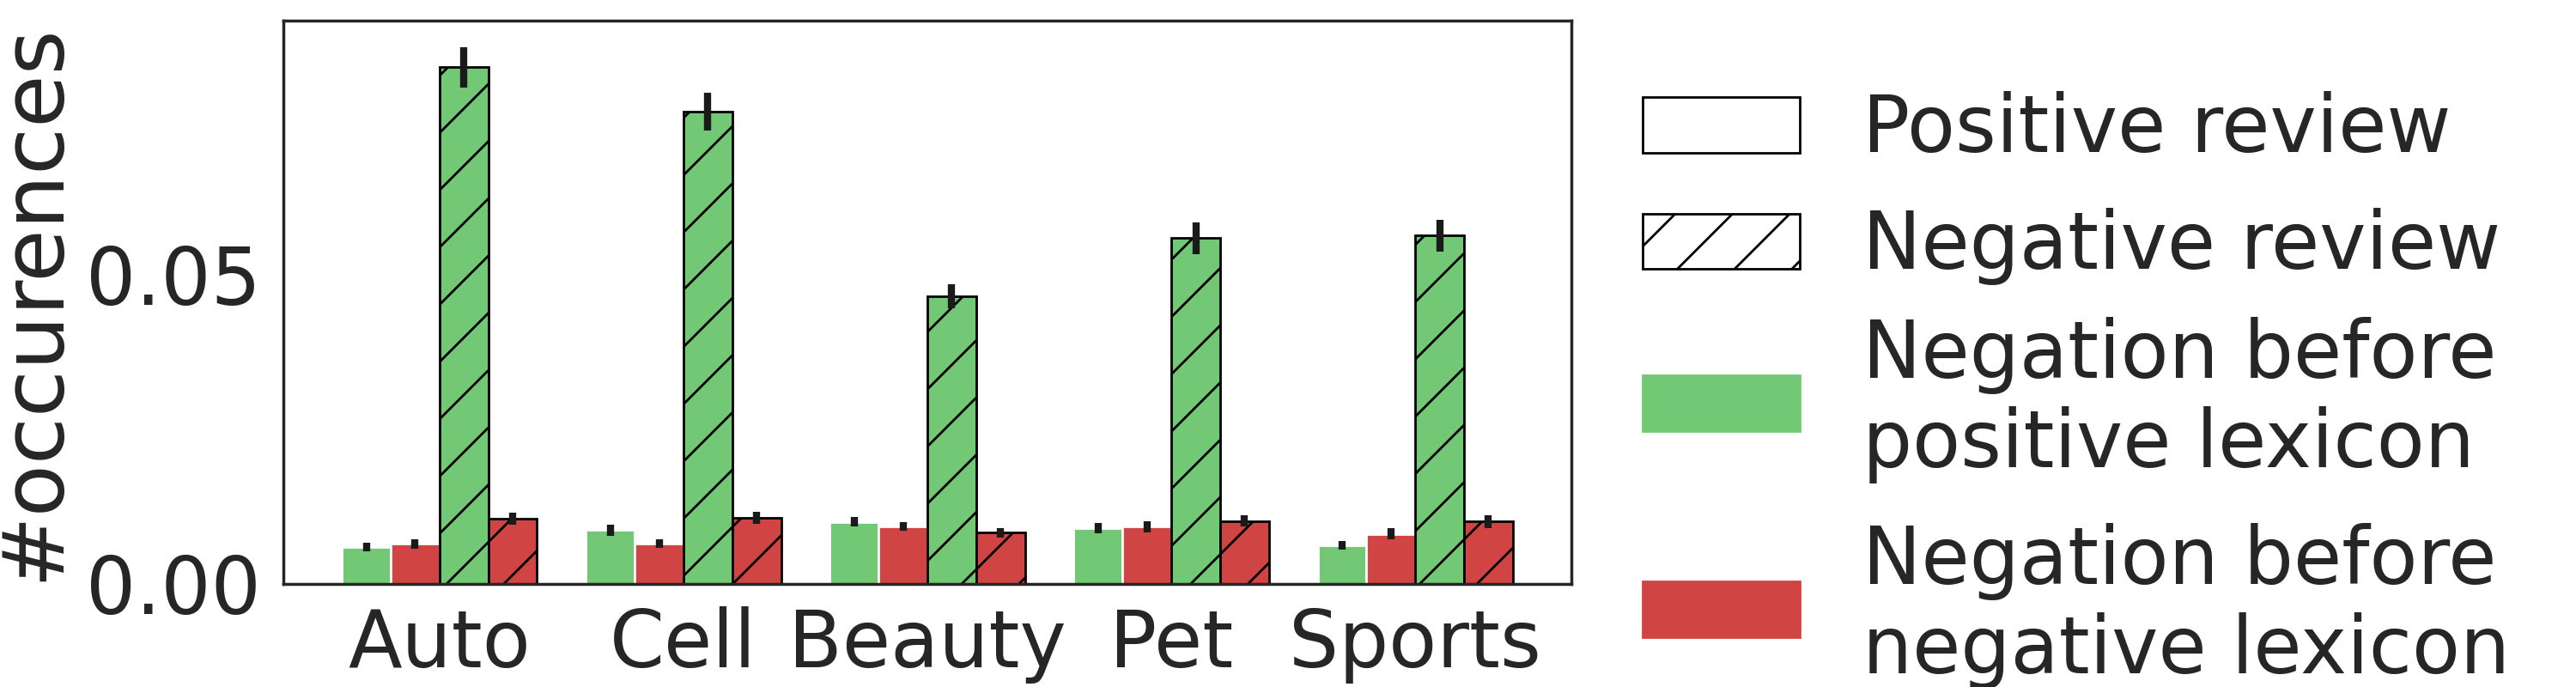

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_sent_level_amz


<IPython.core.display.Javascript object>


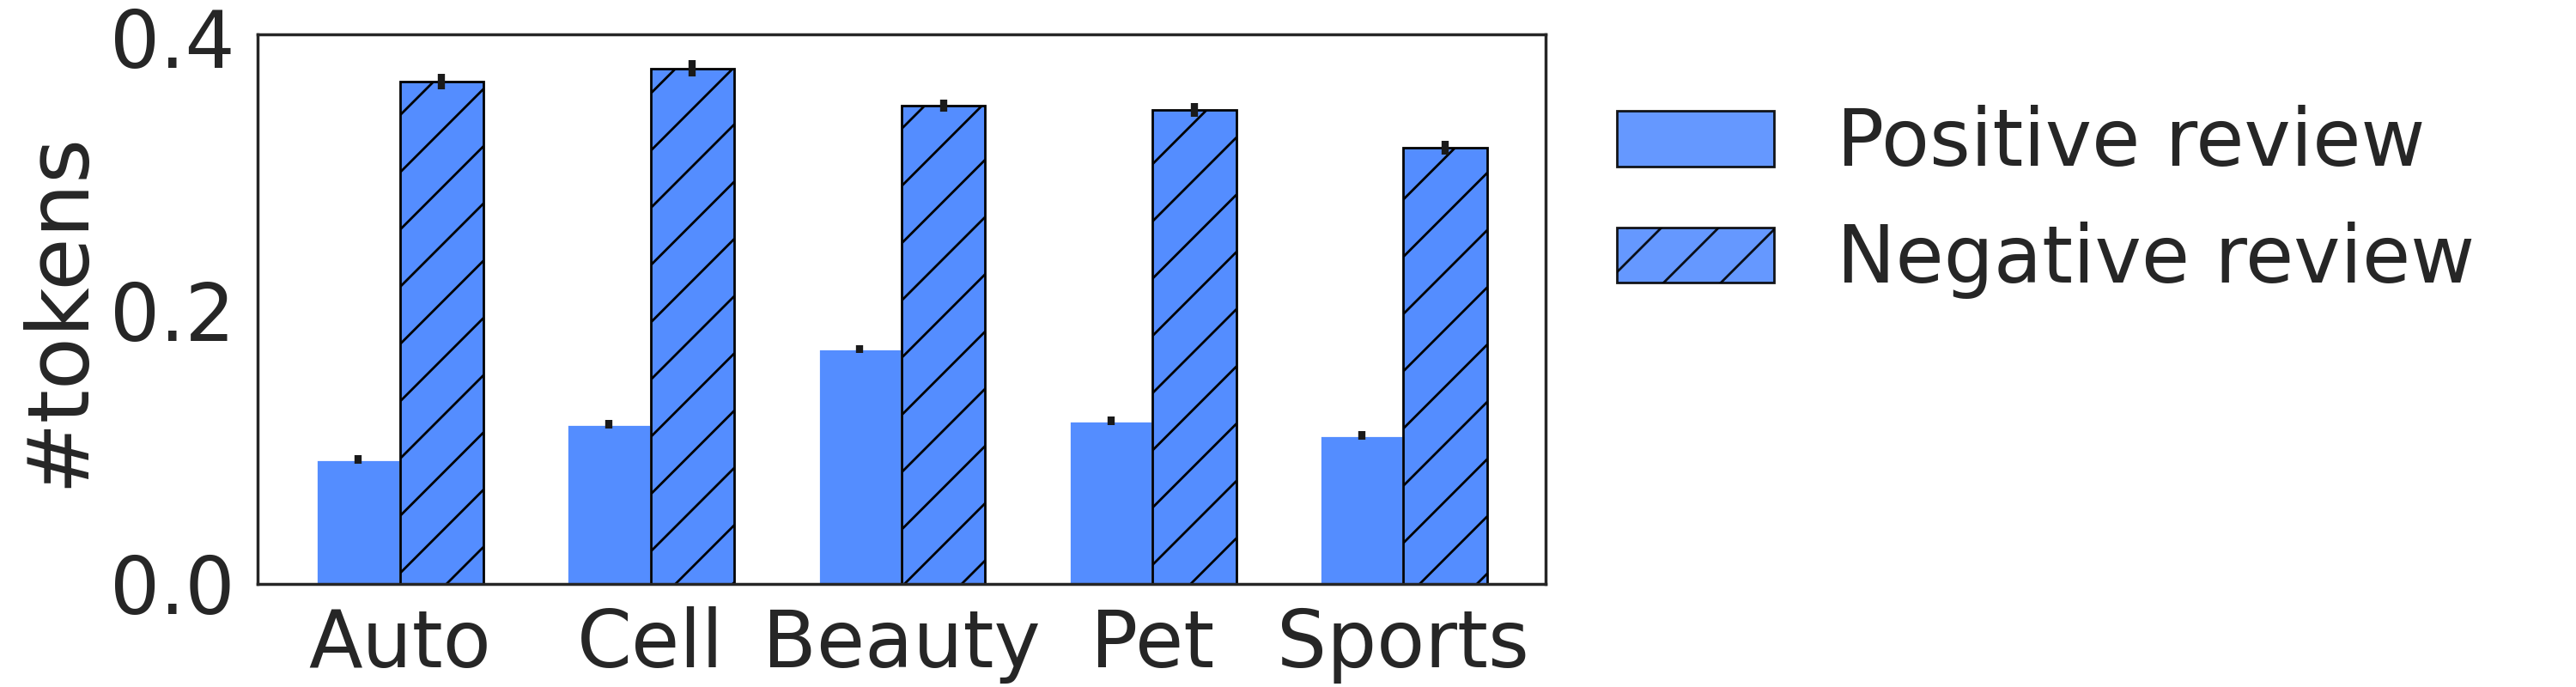

     name     value  sem_value  category
4  Auto    0.091046  0.003026   positive
5  Auto    0.367595  0.005697   negative
0  Cell    0.117059  0.003081   positive
1  Cell    0.377510  0.005689   negative
8  Beauty  0.172042  0.002996   positive
9  Beauty  0.350200  0.004581   negative
2  Pet     0.119442  0.003033   positive
3  Pet     0.346923  0.005070   negative
6  Sports  0.108953  0.003046   positive
7  Sports  0.319583  0.005097   negative
Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_sent_level_non_amz


<IPython.core.display.Javascript object>


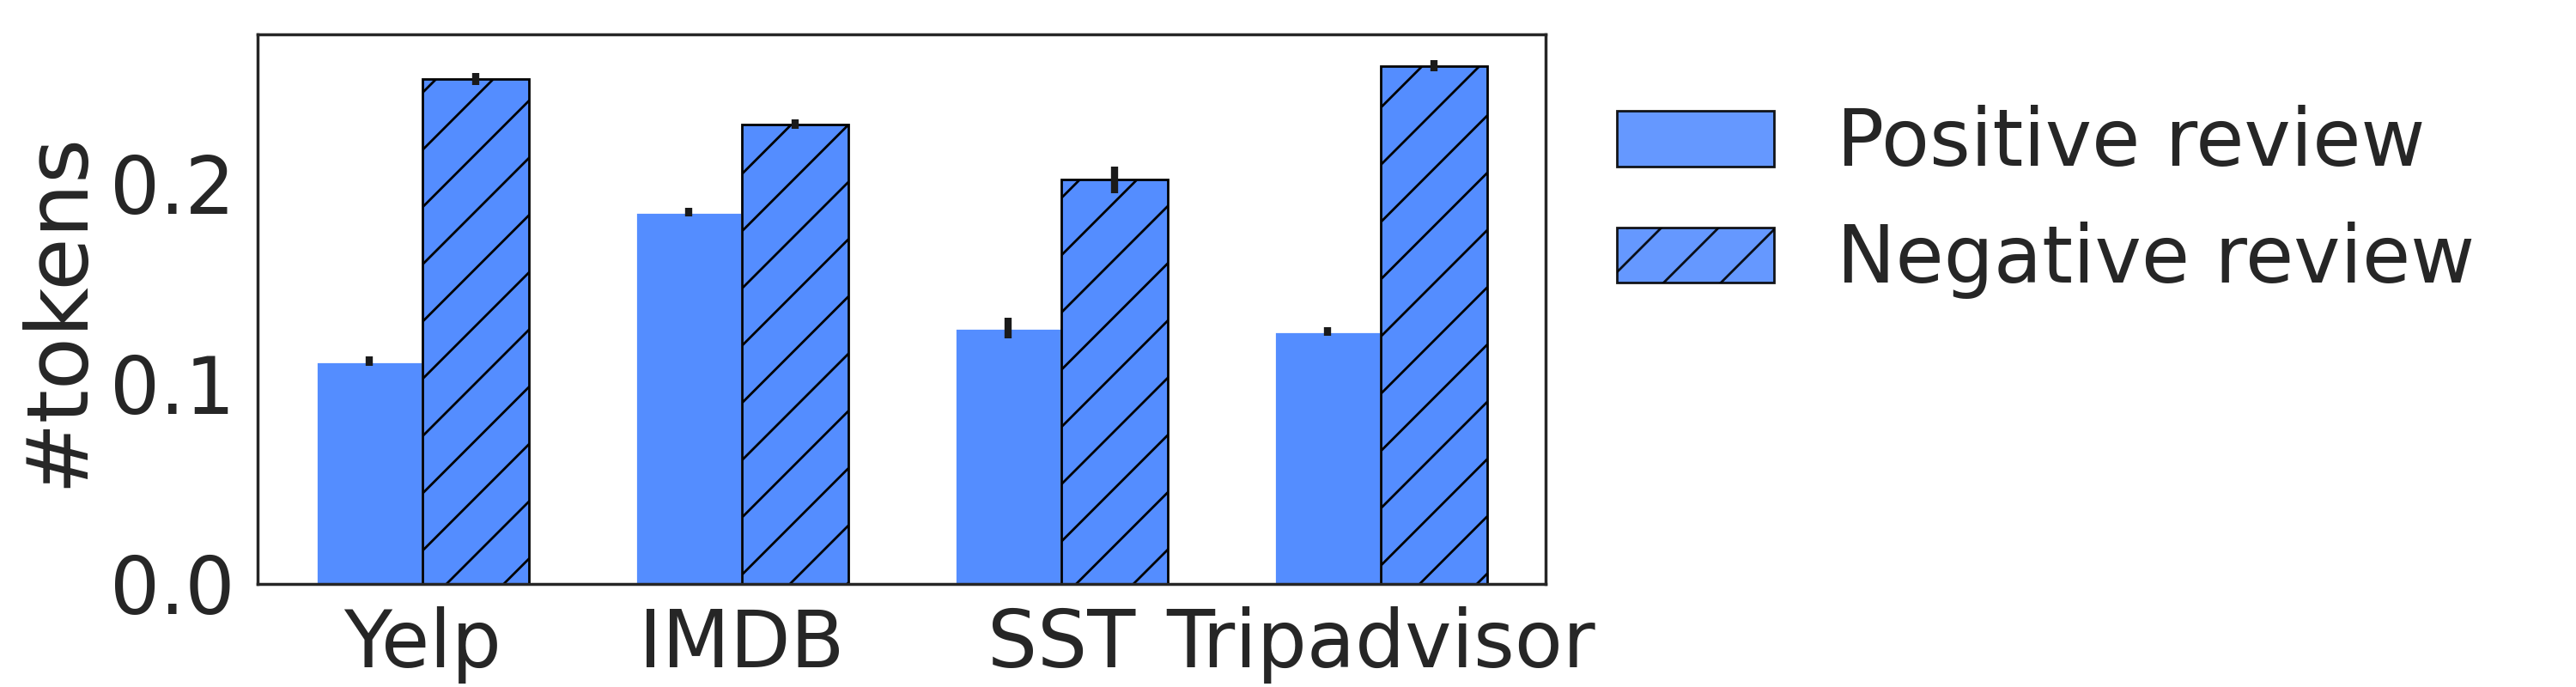

          name     value  sem_value  category
2  Yelp         0.111166  0.002205   positive
3  Yelp         0.251866  0.003000   negative
4  IMDB         0.185381  0.002178   positive
5  IMDB         0.229477  0.002353   negative
0  SST          0.127620  0.005132   positive
1  SST          0.201744  0.006705   negative
6  Tripadvisor  0.125963  0.001986   positive
7  Tripadvisor  0.258457  0.002748   negative
'review_level'
Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_review_level_non_amz


<IPython.core.display.Javascript object>


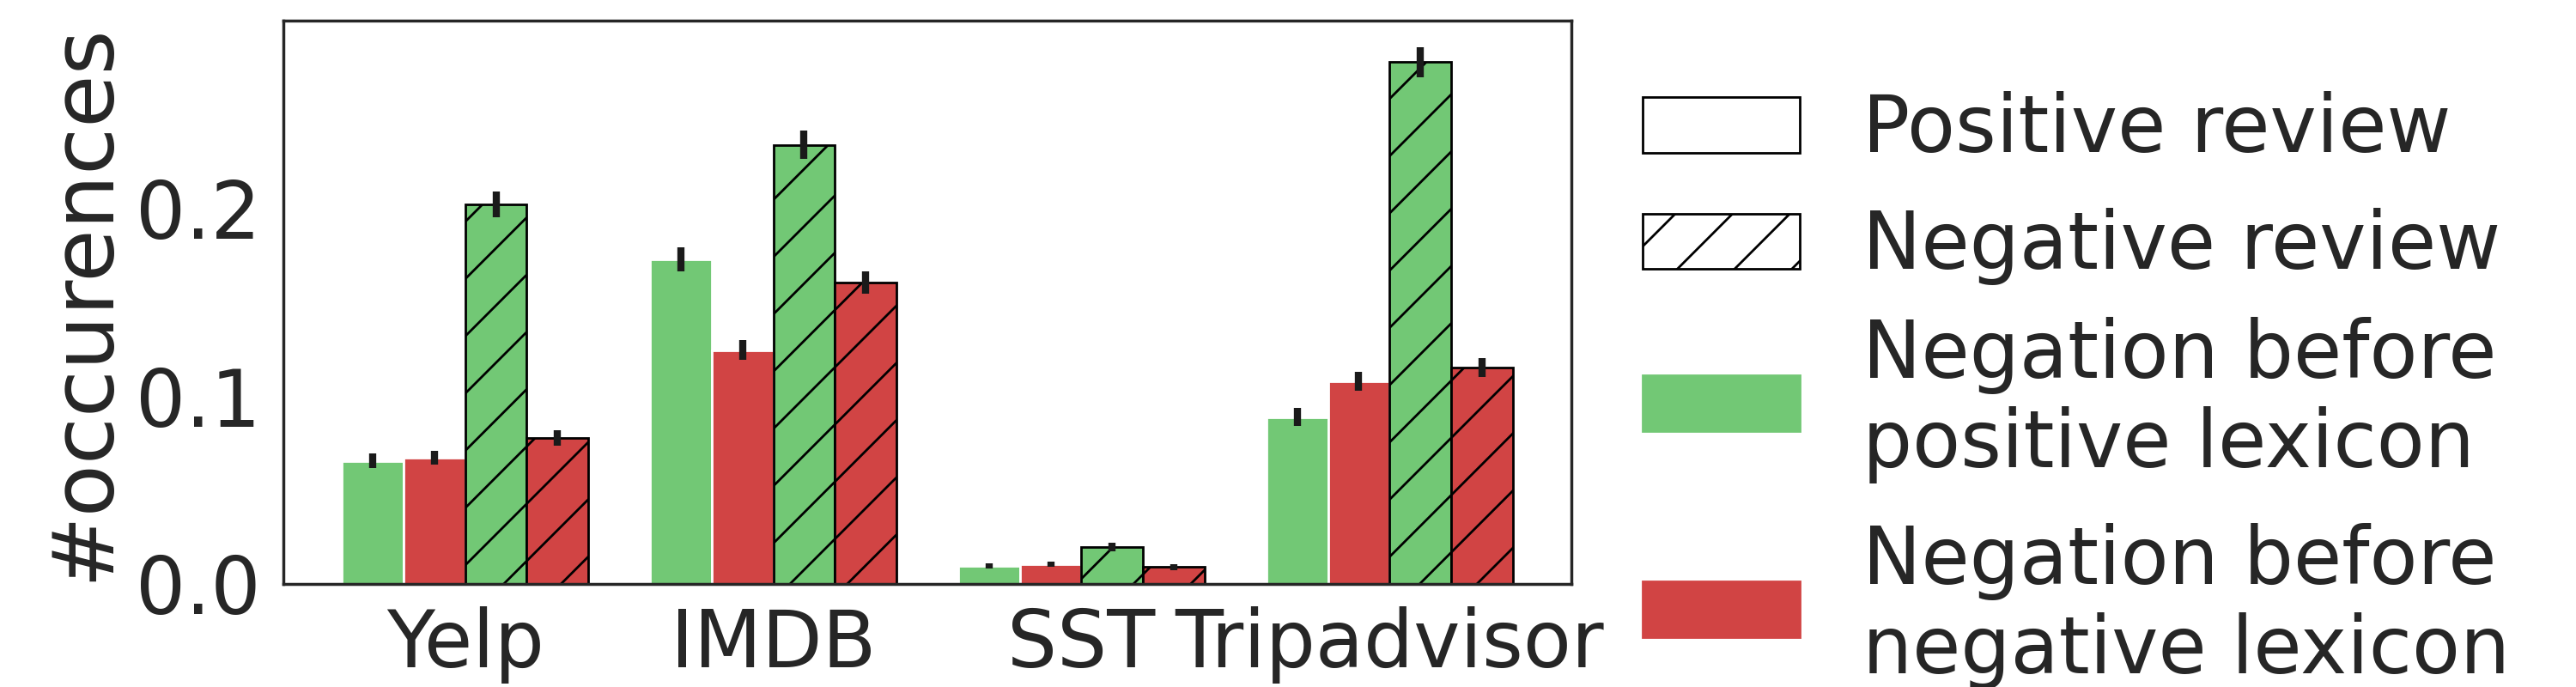

Saving the plot in  ../saves/negation_dep_parsing/pos_neg_negation/pos_neg_negation_depparsing_review_level_amz


<IPython.core.display.Javascript object>


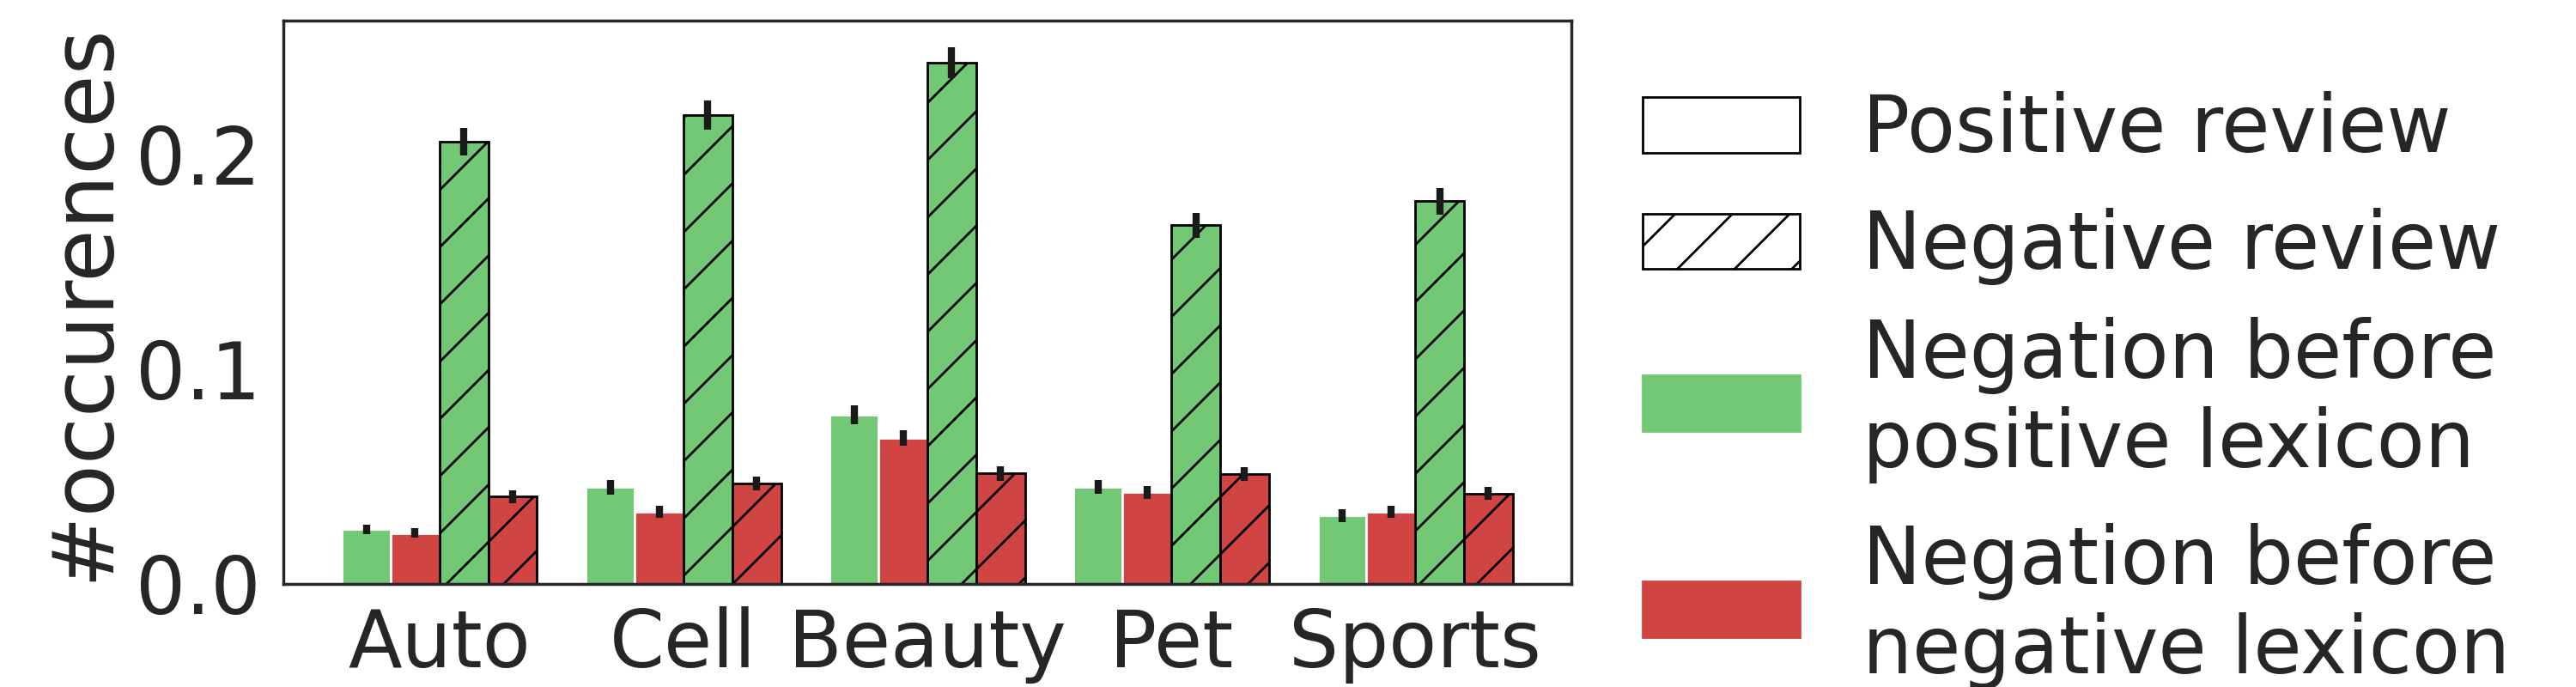

Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_review_level_amz


<IPython.core.display.Javascript object>


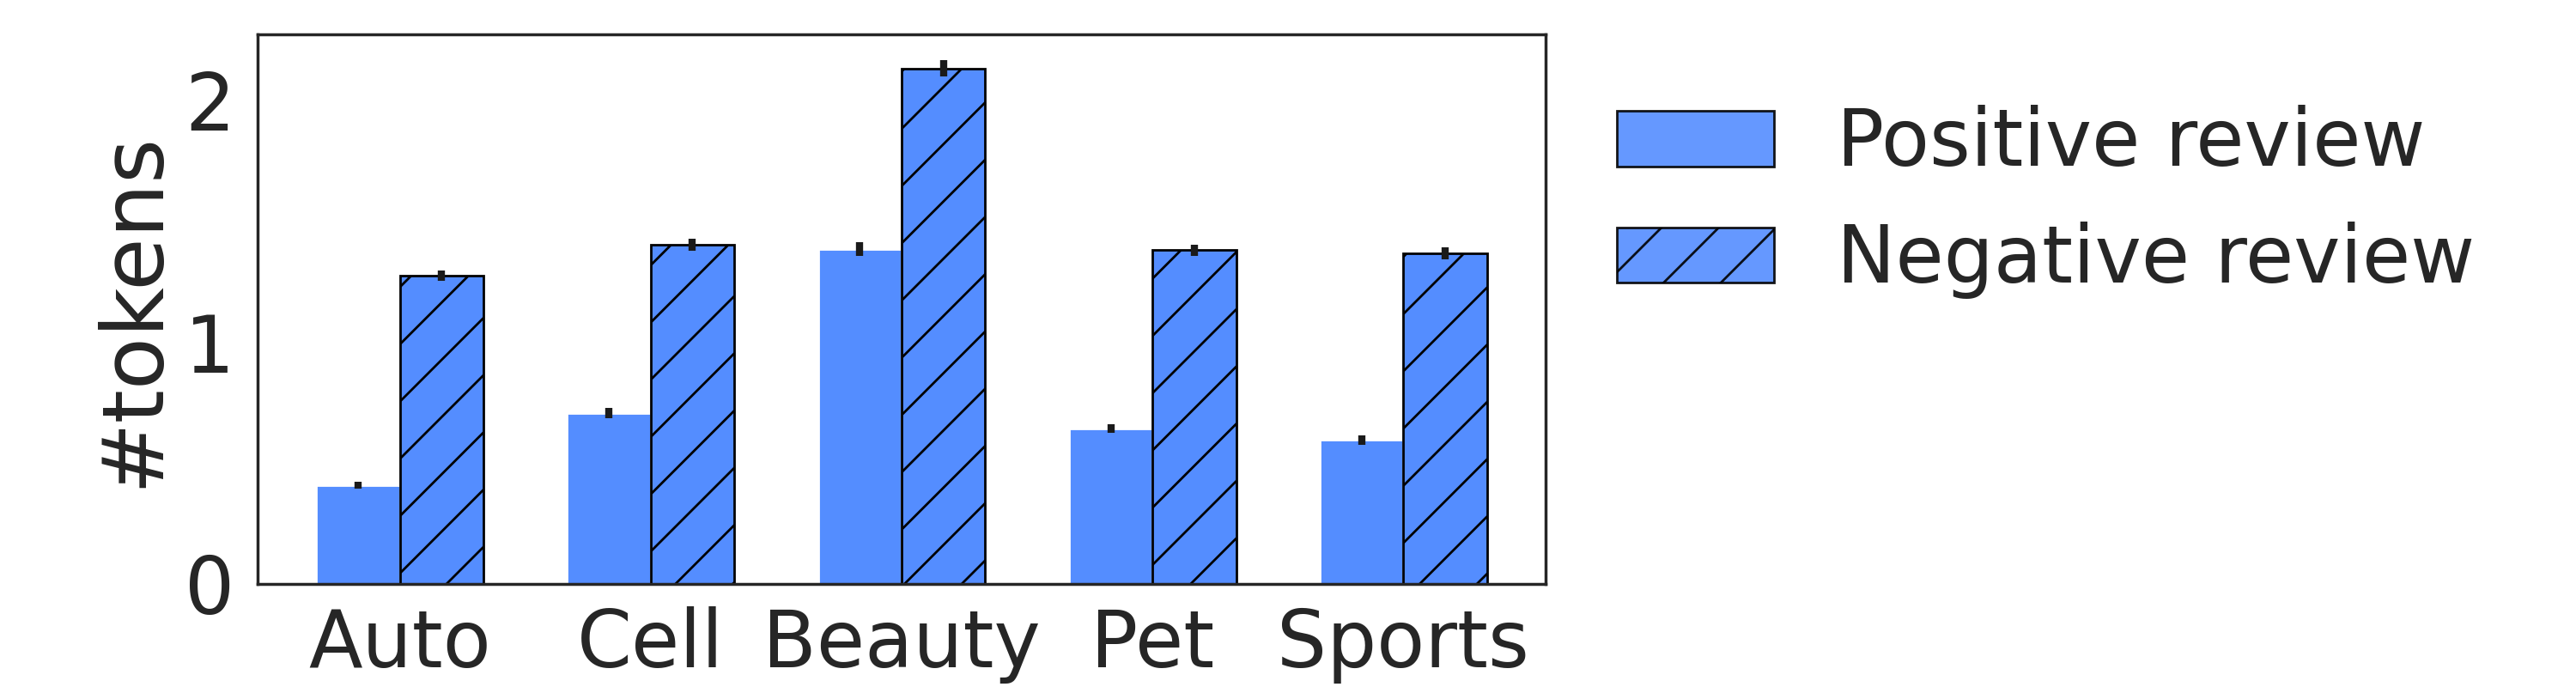

     name   value  sem_value  category
4  Auto    0.4074  0.014083   positive
5  Auto    1.2738  0.021018   negative
0  Cell    0.7044  0.021357   positive
1  Cell    1.4018  0.024781   negative
8  Beauty  1.3824  0.029105   positive
9  Beauty  2.1286  0.033506   negative
2  Pet     0.6424  0.018862   positive
3  Pet     1.3790  0.023605   negative
6  Sports  0.5952  0.019455   positive
7  Sports  1.3668  0.024614   negative
Saving the plot in  ../saves/negation_dep_parsing/overall/overall_negation_depparsing_review_level_non_amz


<IPython.core.display.Javascript object>


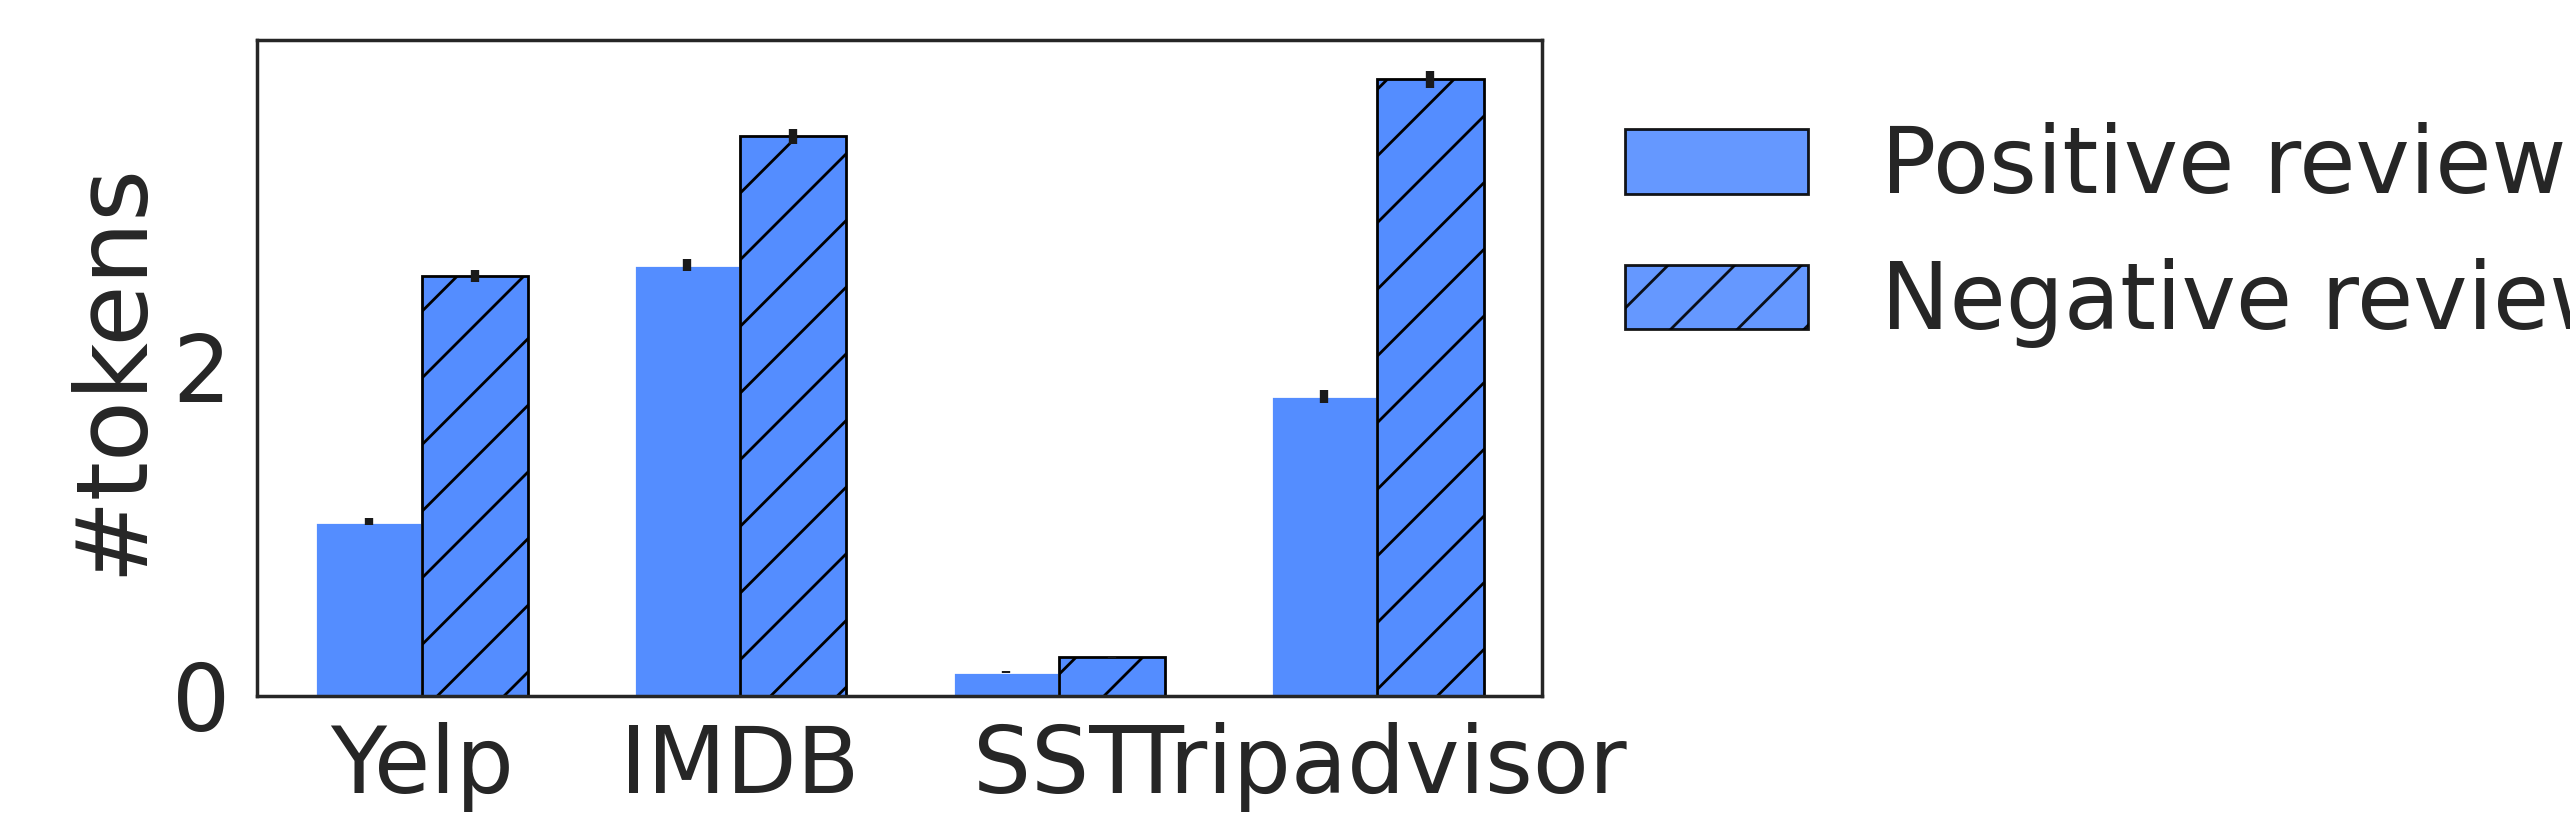

          name     value  sem_value  category
2  Yelp         1.058000  0.022560   positive
3  Yelp         2.546600  0.035892   negative
4  IMDB         2.615400  0.036997   positive
5  IMDB         3.394400  0.043796   negative
0  SST          0.145998  0.005713   positive
1  SST          0.235294  0.007641   negative
6  Tripadvisor  1.817400  0.040506   positive
7  Tripadvisor  3.739400  0.049673   negative


In [9]:
reload(seaborn_plot_util)
for analysis in analysis_types[1:]: 
    plot_data = pickle.load(open(os.path.join(saves_dir, "pos_neg_negation", analysis+"_"+plot_save_prefix+".pickle"), "rb"))
    plot_data_overall_negation = pickle.load(open(os.path.join(saves_dir, "overall", analysis+"_"+"overall_negation_depparsing.pickle"), "rb"))

    myprint(analysis)
    amazon_data, non_amazon_data = util.filter_amazon(plot_data)
    seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
        "review category", "text sentiment", 
        os.path.join(saves_dir, "pos_neg_negation", plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), position=(0.11, 0.15, 0.5, 0.82),
    #   ylim_top=None, 
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        y_axis_name="#occurences",
        negation=True)
    seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
            "review category", "text sentiment",
            os.path.join(saves_dir, "pos_neg_negation",
            plot_save_prefix+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), position=(0.11, 0.15, 0.5, 0.82),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            amazon_data_flag=True,
            y_axis_name="#occurences",
            negation=True)
    
    amazon_data, non_amazon_data = util.filter_amazon(plot_data_overall_negation)
    seaborn_plot_util.draw_grouped_barplot_two_subbars(amazon_data, "name", "value", 
        "category", os.path.join(saves_dir, "overall", "overall_negation_depparsing_"+analysis+"_amz"),
        figsize=(15, 4), 
        position=(0.1, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=True)
    seaborn_plot_util.draw_grouped_barplot_two_subbars(non_amazon_data, "name", "value", 
        "category", os.path.join(saves_dir, "overall", "overall_negation_depparsing_"+analysis+"_non_amz"),
        figsize=(15, 4), 
        position=(0.1, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=False)